<a href="https://colab.research.google.com/github/ivnizhnik/Data_Science_Project_A/blob/main/WorldHappinessReport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Source of data: data.world

from google.colab import drive
drive.mount('/content/drive')

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
df = pd.read_excel('/content/drive/MyDrive/Data_Science_Project_A/WHR20_DataForFigure2.1.xls')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900826,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


***First choice: dataset 1***

**1) Source of data:** Data World 2020

**2) Brief description of data:** The dataset is the World Happiness Report 2020 by Data World. It consists of 20 columns/features and 153 rows (each row for a country) with zero missing data as well as zero duplicated rows. The brief statistical overview of the dataset provides a healthy start for data exploration and further analysis.

**3) What is the target?** The target (y) is the ladder score which is a proxy for happiness level on the scale of 0-10. The other features in the dataset includes things like GDP/capita, freedom levels, corruption levels, etc. all the variables that may impact happiness level.

**4) Is this a classification or regression problem?** This is originally a regression problem as y is continuous. But I also intend to create new features (e.g., less than 3 stands for low happiness).

**5) How many features?** 20 

**6) How many rows of data?** 153

**7) What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?** I think the dataset provides opportunity to practice both regression models as well as classifications. Would be interesting to see if the insights coming out of the different approaches are directionally similar.

In [4]:
df.shape  

(153, 20)

In [5]:
df.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,153.00000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,5.47324,0.053538,5.578175,5.368304,9.295706,0.808721,64.445529,0.783360,-0.014568,0.733120,1.972317,0.868771,1.155607,0.692869,0.463583,0.189375,0.130718,1.972317
std,1.11227,0.018183,1.096823,1.128631,1.201588,0.121453,7.057848,0.117786,0.151809,0.175172,0.000000,0.372416,0.286866,0.254094,0.141172,0.100401,0.113097,0.563638
min,2.56690,0.025902,2.628270,2.505530,6.492642,0.319460,45.200001,0.396573,-0.300907,0.109784,1.972317,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.257241
25%,4.72410,0.040698,4.826248,4.603149,8.350645,0.737217,58.961712,0.714839,-0.127015,0.683019,1.972317,0.575862,0.986718,0.495443,0.381457,0.115006,0.055805,1.629928
50%,5.51500,0.050606,5.607728,5.430644,9.456313,0.829204,66.305145,0.799805,-0.033665,0.783122,1.972317,0.918549,1.203987,0.759818,0.483293,0.176745,0.098435,2.046272
75%,6.22850,0.060677,6.363886,6.138881,10.265124,0.906747,69.289192,0.877709,0.085429,0.849151,1.972317,1.169229,1.387139,0.867249,0.576665,0.255510,0.163064,2.350267
max,7.80870,0.120590,7.869766,7.747634,11.450681,0.974670,76.804581,0.974998,0.560664,0.935585,1.972317,1.536676,1.547567,1.137814,0.693270,0.569814,0.533162,3.440810


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                153 non-null    object 
 1   Regional indicator                          153 non-null    object 
 2   Ladder score                                153 non-null    float64
 3   Standard error of ladder score              153 non-null    float64
 4   upperwhisker                                153 non-null    float64
 5   lowerwhisker                                153 non-null    float64
 6   Logged GDP per capita                       153 non-null    float64
 7   Social support                              153 non-null    float64
 8   Healthy life expectancy                     153 non-null    float64
 9   Freedom to make life choices                153 non-null    float64
 10  Generosity    

Checking for missing values

In [7]:
df.isnull().sum()

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

Checking for duplicates

In [8]:
df.duplicated().sum()

0

Checking and correcting inconsistencies

In [13]:
df['Country name'].value_counts()

Ethiopia         1
Yemen            1
Uzbekistan       1
United States    1
Israel           1
                ..
Argentina        1
Finland          1
Greece           1
Japan            1
Tajikistan       1
Name: Country name, Length: 153, dtype: int64

In [14]:
df['Regional indicator'].value_counts()

Sub-Saharan Africa                    39
Western Europe                        21
Latin America and Caribbean           21
Middle East and North Africa          17
Central and Eastern Europe            17
Commonwealth of Independent States    12
Southeast Asia                         9
South Asia                             7
East Asia                              6
North America and ANZ                  4
Name: Regional indicator, dtype: int64

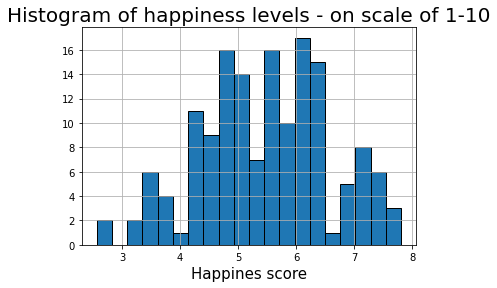

In [15]:
df['Ladder score'].hist(bins=20, edgecolor='black');
plt.title('Histogram of happiness levels - on scale of 1-10', fontsize = 20)
plt.xlabel('Happines score', fontsize = 15)
plt.show()

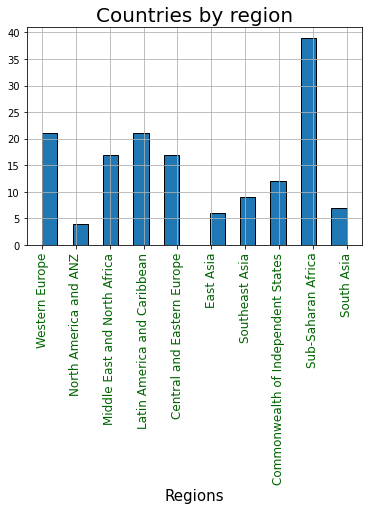

In [17]:
df['Regional indicator'].hist(bins=20, edgecolor='black');
plt.title('Countries by region', fontsize = 20)
plt.xlabel('Regions', fontsize = 15)
plt.xticks(rotation = 90, fontsize = 12, c = 'darkgreen')
plt.show()

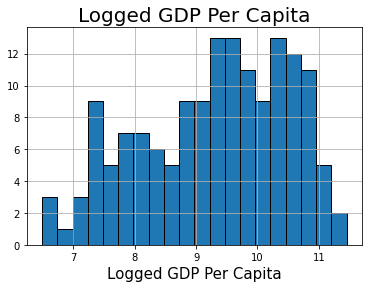

In [19]:
df['Logged GDP per capita'].hist(bins=20, edgecolor='black');
plt.title('Logged GDP Per Capita', fontsize = 20)
plt.xlabel('Logged GDP Per Capita', fontsize = 15)
plt.show()

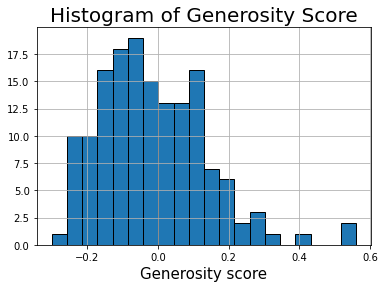

In [20]:
df['Generosity'].hist(bins=20, edgecolor='black');
plt.title('Histogram of Generosity Score', fontsize = 20)
plt.xlabel('Generosity score', fontsize = 15)
plt.show()

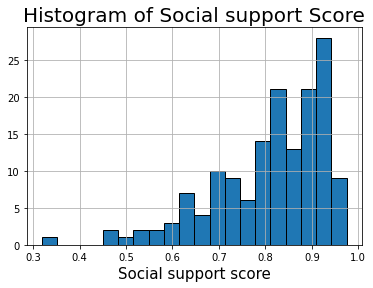

In [22]:
df['Social support'].hist(bins=20, edgecolor='black');
plt.title('Histogram of Social support Score', fontsize = 20)
plt.xlabel('Social support score', fontsize = 15)
plt.show()

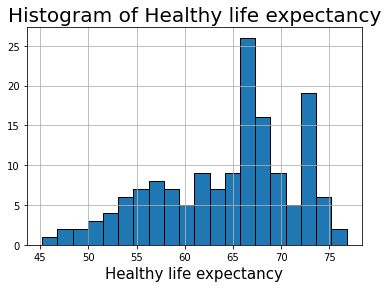

In [23]:
df['Healthy life expectancy'].hist(bins=20, edgecolor='black');
plt.title('Histogram of Healthy life expectancy', fontsize = 20)
plt.xlabel('Healthy life expectancy', fontsize = 15)
plt.show()

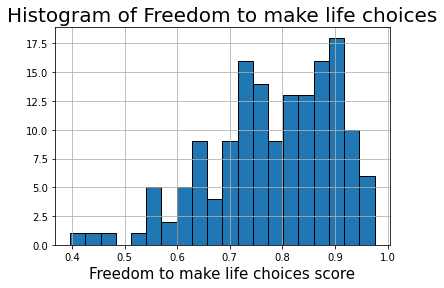

In [25]:
df['Freedom to make life choices'].hist(bins=20, edgecolor='black');
plt.title('Histogram of Freedom to make life choices', fontsize = 20)
plt.xlabel('Freedom to make life choices score', fontsize = 15)
plt.show()

In [26]:
# Now getting the ranges and min/max/median/average numbers
df.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,153.00000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,5.47324,0.053538,5.578175,5.368304,9.295706,0.808721,64.445529,0.783360,-0.014568,0.733120,1.972317,0.868771,1.155607,0.692869,0.463583,0.189375,0.130718,1.972317
std,1.11227,0.018183,1.096823,1.128631,1.201588,0.121453,7.057848,0.117786,0.151809,0.175172,0.000000,0.372416,0.286866,0.254094,0.141172,0.100401,0.113097,0.563638
min,2.56690,0.025902,2.628270,2.505530,6.492642,0.319460,45.200001,0.396573,-0.300907,0.109784,1.972317,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.257241
25%,4.72410,0.040698,4.826248,4.603149,8.350645,0.737217,58.961712,0.714839,-0.127015,0.683019,1.972317,0.575862,0.986718,0.495443,0.381457,0.115006,0.055805,1.629928
50%,5.51500,0.050606,5.607728,5.430644,9.456313,0.829204,66.305145,0.799805,-0.033665,0.783122,1.972317,0.918549,1.203987,0.759818,0.483293,0.176745,0.098435,2.046272
75%,6.22850,0.060677,6.363886,6.138881,10.265124,0.906747,69.289192,0.877709,0.085429,0.849151,1.972317,1.169229,1.387139,0.867249,0.576665,0.255510,0.163064,2.350267
max,7.80870,0.120590,7.869766,7.747634,11.450681,0.974670,76.804581,0.974998,0.560664,0.935585,1.972317,1.536676,1.547567,1.137814,0.693270,0.569814,0.533162,3.440810


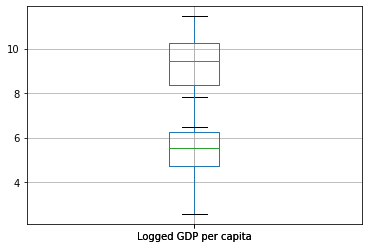

In [28]:
# Adding some box plots to visualize the ranges
df.boxplot(column='Ladder score');

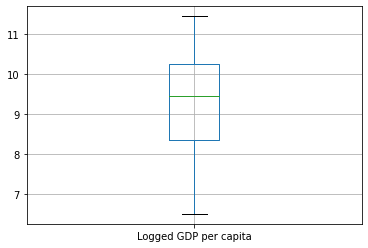

In [29]:
df.boxplot(column='Logged GDP per capita');

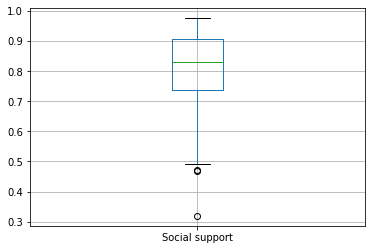

In [30]:
df.boxplot(column='Social support');

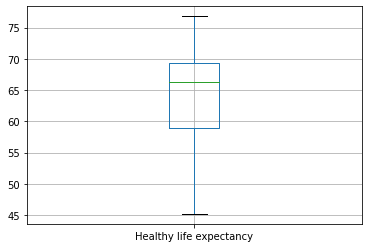

In [31]:
df.boxplot(column='Healthy life expectancy');

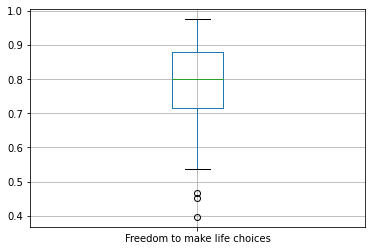

In [33]:
df.boxplot(column='Freedom to make life choices');

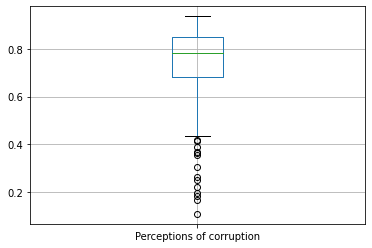

In [34]:
df.boxplot(column='Perceptions of corruption');

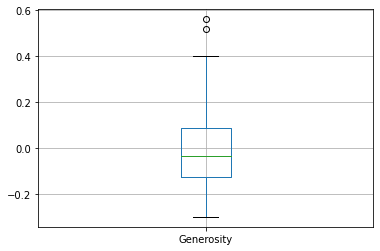

In [35]:
df.boxplot(column='Generosity');

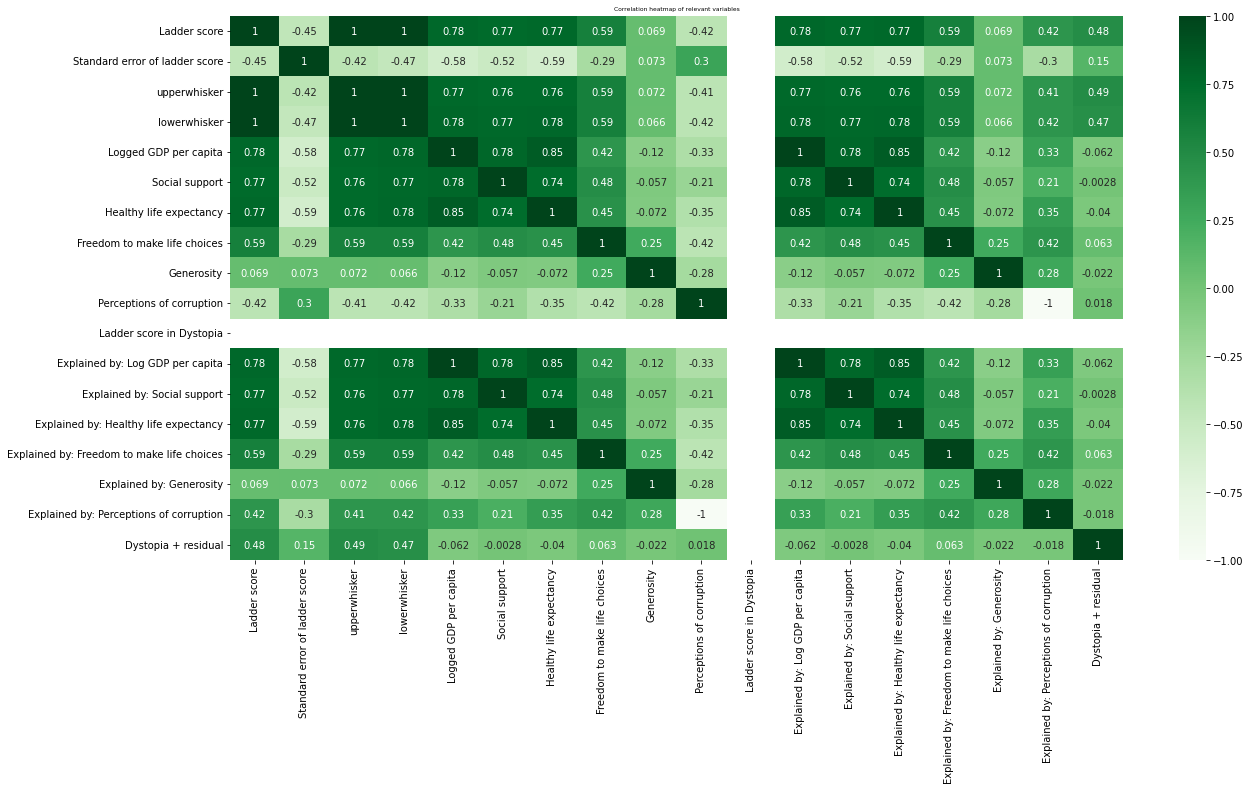

In [24]:
# Running a heatmap of correlations to check for high areas of correlation
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (20, 10))
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True);
plt.title('Correlation heatmap of relevant variables', fontsize = 6, c='k');

The correlation heatmap shows a number of important relationships:
- Very high correlation between happines score (Ladder Score) and Social support levels, GDP Per Capita, Healthy life expectency, Freedom to make life choices
- Not a very high correlation between Ladder Score and Generosity or Perception of Corruption
- Some of the features also show significant correlation with each other, for example, social support levels with GDP Per Capita